In [1]:
from google.colab import drive
drive.mount('gdrive')
!unzip gdrive/My\ Drive/ColabNotebooks/zip

Mounted at gdrive
Archive:  gdrive/My Drive/ColabNotebooks/zip
   creating: content/
   creating: content/.config/
 extracting: content/.config/active_config  
   creating: content/.config/configurations/
  inflating: content/.config/configurations/config_default  
   creating: content/.config/logs/
   creating: content/.config/logs/2021.08.25/
  inflating: content/.config/logs/2021.08.25/13.35.16.953377.log  
  inflating: content/.config/logs/2021.08.25/13.35.22.941499.log  
  inflating: content/.config/logs/2021.08.25/13.34.42.215914.log  
  inflating: content/.config/logs/2021.08.25/13.35.41.801770.log  
  inflating: content/.config/logs/2021.08.25/13.35.00.944587.log  
  inflating: content/.config/logs/2021.08.25/13.35.40.963605.log  
 extracting: content/.config/config_sentinel  
 extracting: content/.config/gce     
  inflating: content/.config/.last_update_check.json  
 extracting: content/.config/.last_opt_in_prompt.yaml  
 extracting: content/.config/.last_survey_prompt.yaml  

Move stuff out of content into content one directory up


In [2]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [3]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661033 sha256=e5e34ae63f4ec321ac620b164c535d8af7901b6ab97c42fc9dcbc18ce2095667
  Stored in directory: /tmp/pip-ephem-wheel-cache-kgtm55f0/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=f46155a849dda0dded2e25f19a092e2c3a60479edec766e9385484b41cfc1247
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=97a9e56e963d4c69461b7a3f97178904ec26d7e9df3de95be3cac860c8860d04
  Stored in directory: /root/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78546 sha256=9e13af3b1d868987f0f3782e15f1d2a19be1de962647cea20

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [5]:
test_record_fname = '/content/valid/spiky.tfrecord'
train_record_fname = '/content/train/spiky.tfrecord'
label_map_pbtxt_fname = '/content/train/spiky_label_map.pbtxt'

In [15]:
MODELS_CONFIG = {
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 16
    }
}

chosen_model = 'efficientdet-d0'

num_steps = 40000 
num_eval_steps = 500 

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] 

In [7]:
pipeline_file = '/content/models/research/deploy/pipeline_file.config'
model_dir = '/content/training/'

In [8]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [9]:
%ls '/content/training/'

checkpoint                   ckpt-38.index
ckpt-35.data-00000-of-00001  ckpt-39.data-00000-of-00001
ckpt-35.index                ckpt-39.index
ckpt-36.data-00000-of-00001  ckpt-40.data-00000-of-00001
ckpt-36.index                ckpt-40.index
ckpt-37.data-00000-of-00001  ckpt-41.data-00000-of-00001
ckpt-37.index                ckpt-41.index
ckpt-38.data-00000-of-00001  train/


In [11]:
import pathlib

filenames = list(pathlib.Path('/content/training/').glob('*.index'))

filenames.sort()
print(filenames)

#recover saved model
pipeline_config = pipeline_file
model_dir = str(filenames[-1]).replace('.index','')
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(str(filenames[-1]).replace('.index','')))


def get_model_detection_function(model):

  @tf.function
  def detect_fn(image):

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

[PosixPath('/content/training/ckpt-35.index'), PosixPath('/content/training/ckpt-36.index'), PosixPath('/content/training/ckpt-37.index'), PosixPath('/content/training/ckpt-38.index'), PosixPath('/content/training/ckpt-39.index'), PosixPath('/content/training/ckpt-40.index'), PosixPath('/content/training/ckpt-41.index')]


In [12]:
#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [13]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  x = np.array(image.getdata())
  if np.size(np.array(image.getdata())[0]) == 3:
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
    # print("here")
  elif np.size(np.array(image.getdata())[0]) == 1:
    bigarr = []
    for i in np.arange(len(np.array(image.getdata()))):
      temp = [x[i], x[i], x[i]]
      bigarr += [temp]
    # print(np.shape(np.array(bigarr)))
    return np.array(bigarr).reshape((im_height, im_width, 3)).astype(np.uint8)


/content/test/test/-08272021_033441_686-Filter-RBC-_Image-10-_png.rf.c76cd1930f9c8086f28dd01b65cf388e.jpg
objs 6


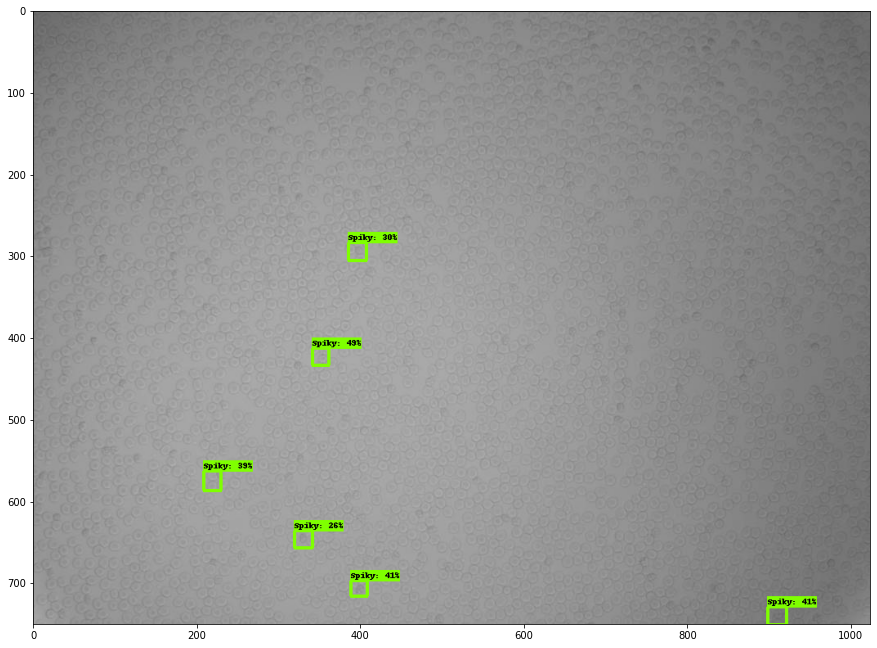

/content/test/test/-08242021_035604_564-Filter-RBC-_Image-37-_png.rf.d01e4d73ca93339c35d6e1e910b84216.jpg
objs 2


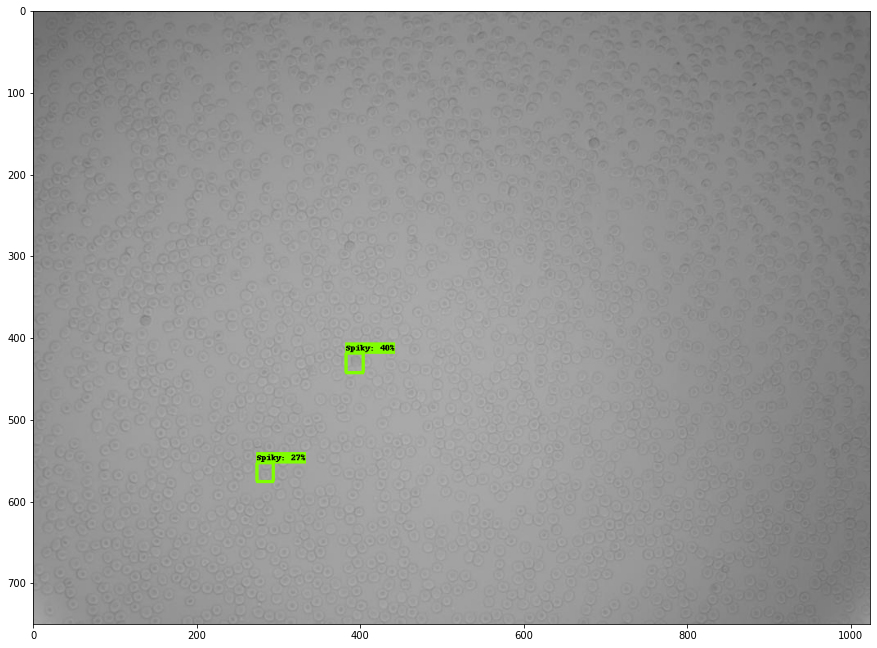

/content/test/test/-08242021_035616_091-Filter-RBC-_Image-38-_png.rf.f5493daa6c1b27dd7f34ac4c18e53409.jpg
objs 0


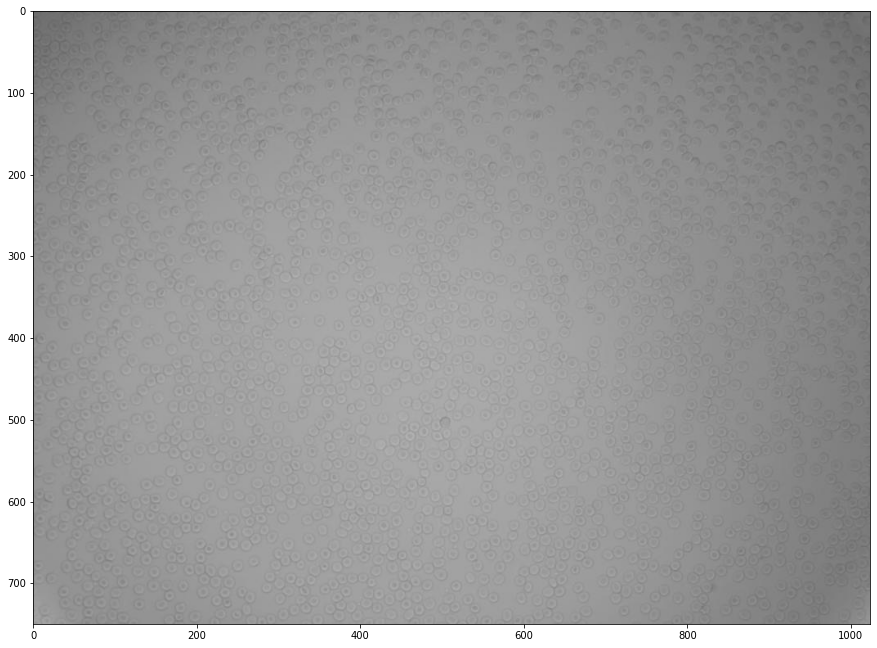

/content/test/test/-08132021_181119_054-Filter-RBC-_Image-3-_png.rf.609754cfb46b49331c7a3b5c37a62d80.jpg
objs 1
saved


In [14]:
#run detector on test image
import random
from openpyxl import load_workbook
from openpyxl import Workbook

try:
    wb = load_workbook(filename= 'tempdata.xlsx')
except FileNotFoundError:
    wb = Workbook()
ws = wb.active

row = 1

count = 0
TEST_IMAGE_PATHS = glob.glob('/content/test/test/*.jpg')
for image in TEST_IMAGE_PATHS:
  
  image_path = image
  print(image_path)

  image_np = load_image_into_numpy_array(image_path)

  # Flip horizontally
  # image_np = np.fliplr(image_np).copy()

  # Convert image to grayscale
  # image_np = np.tile(
  #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

  input_tensor = tf.convert_to_tensor(
      np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)
  # print("detections", detections['num_detections'][0].numpy())


  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  min_score_threshold = 0.25
  scores =  detections['detection_scores'][0].numpy()
  objects_detected = 0
  for i in scores:
    if i >= min_score_threshold:
      objects_detected +=1
  print("objs", objects_detected)
  ws.cell(row, 1, objects_detected)
  ws.cell(row,2, image_path.partition('].jpg')[0].partition('Image[')[2])
  row +=1


  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=4000,
        min_score_thresh=min_score_threshold,
        agnostic_mode=False,
  )

  if count < 3:
    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    plt.show()
  elif objects_detected >= 14:
    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    plt.show()
  count +=1

while True:
      try:
          wb.save('tempdata.xlsx')
          print("saved")
          break
      except Exception as e:
          print(e)